# Get started with 3D array

Import all modules:

In [13]:
from drp_template.image import save_figure2, plot_slice, plot_histogram
import drp_template.input_output as io
from drp_template.default_params import update_parameters_file
from drp_template.math import get_connected_porosity, get_phase_fractions, label_binary
import numpy as np
from drp_template.tools import mk_paramsfile

Set the file path of your 3D array. For the example you can use a provided 2 phase binary.

In [25]:
# file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_segmented.raw'
file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw'
raw_file_path = '/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube.raw'
# raw_file_path = 'data/raw_100cube.raw'

Each 3D.raw must be imported based on it's corresponding parameters like dimensions (nx, ny, nz) or type (uint8, uint16, uint32). The following data (uint8) is sorted in the shape of `data[nz, ny, nx]`. Due to dimensions rules (see README.md) all arrays must be in the format of `data[nx, ny, nz]`. The programm can handle the conversion on its own based on the provided order of dimensions. Regular as well as irregular data can be imported.

In [27]:
dimensions = {'nz': 400, 'ny': 400, 'nx': 400}
dimensions_raw = {'nz': 400, 'ny': 400, 'nx': 400}
data = io.import_model(file_path, dtype='uint8', dimensions=dimensions)
data_raw = io.import_model(raw_file_path, dtype='uint16', dimensions=dimensions_raw)

Parameters filename: 400Cube_all_phases_threshold.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400
------------------------------------------------------------------------------------------------------------------------------------------------------
/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/SCIENCE_WORLD/CONFERENCES/EGU2025/NKeutchafo/data/400Cube_all_phases_threshold.raw: 
Ups, the minimum value in your data is 1. Automatic adjustments are needed.                                                                           
------------------------------------------------------------------------------------------------------------------------------------------------------
Parameters filename: 400Cube.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 400
ny: 400
nz: 400


In case a subvolume is needed, a corresponding `paramsfile` must be prepared which is always created while importing. 

In [28]:
# Define the parameter-file
# params_file='subvolume_100_100_100.json'
params_file = '400Cube_segmented.json'

The binaries can also be enriched with labels like pore, matrix, etc.

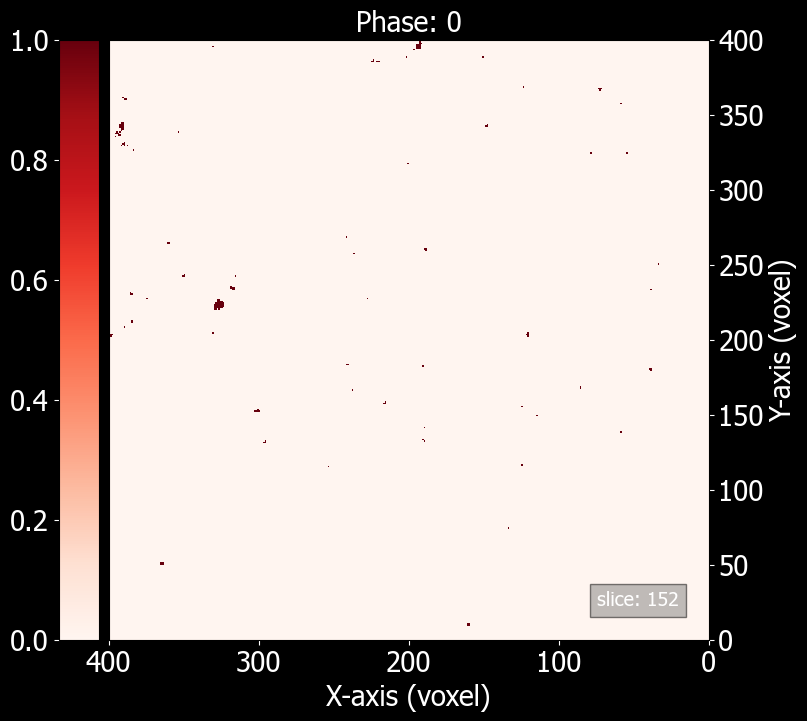

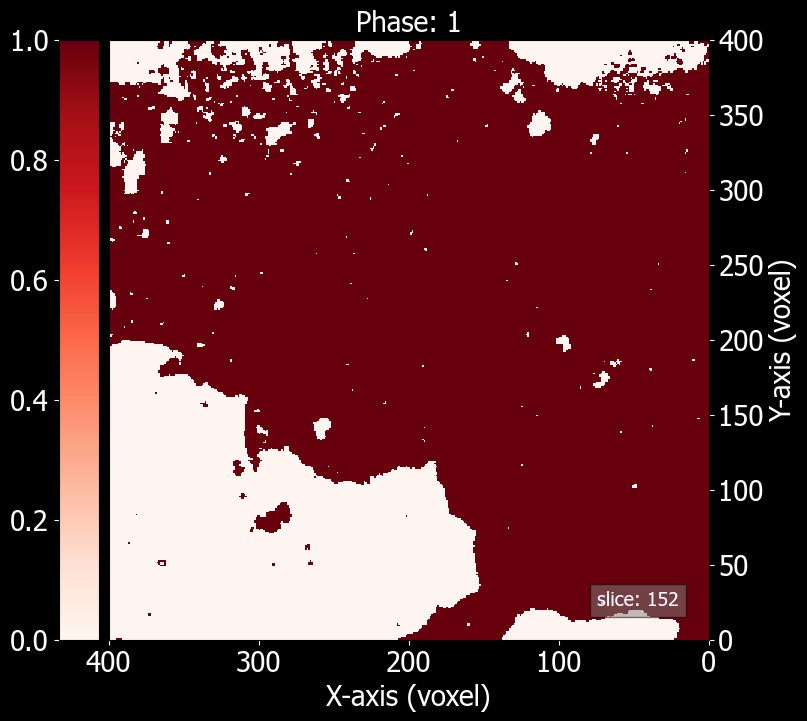

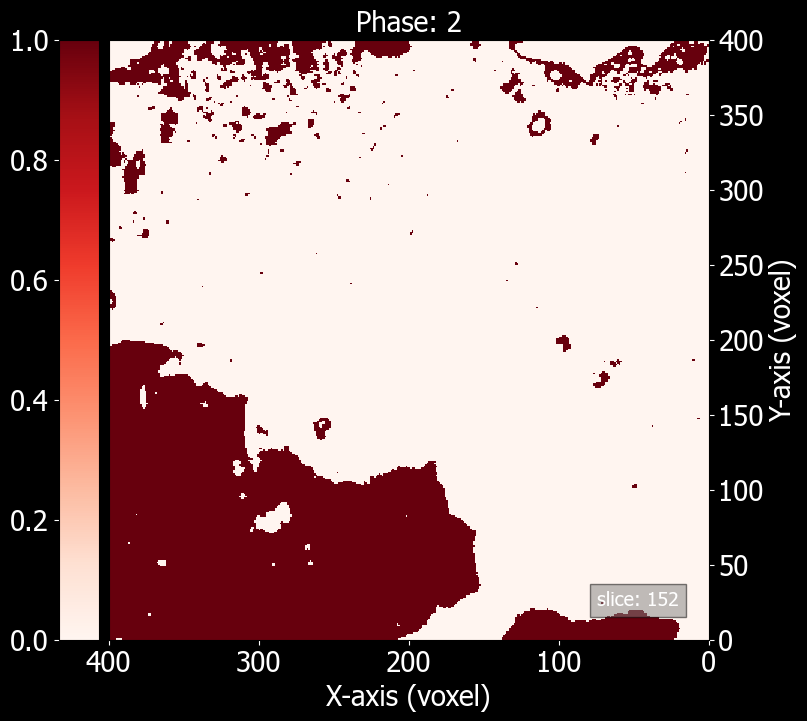

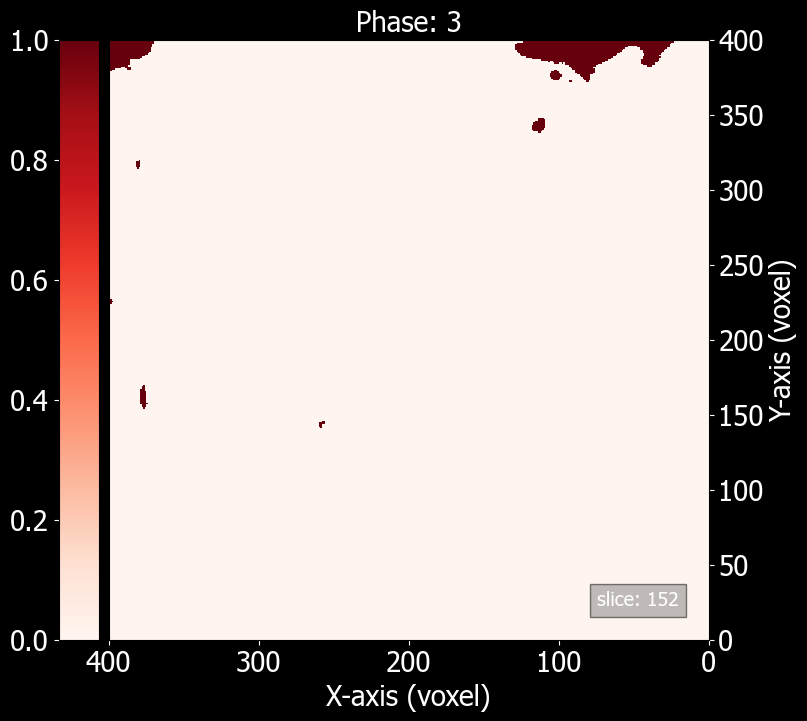

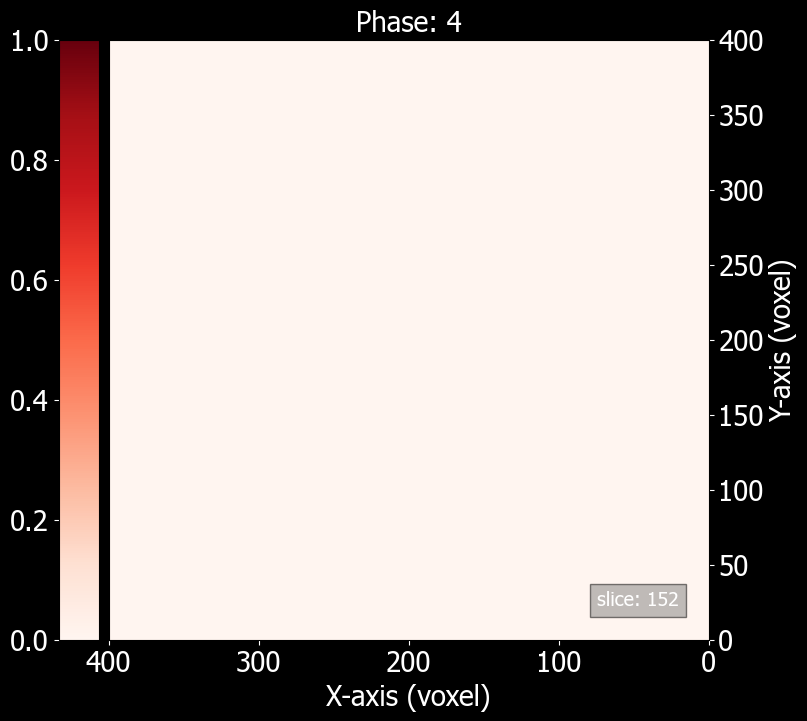

{'0': 'Pore', '1': 'Qtz', '2': 'Fsp', '3': 'Bt', '4': 'hDensity'}


In [29]:
# labels = {0: 'Pore', 1: 'Matrix'} # Define labels
labels = label_binary(data, paramsfile=params_file)
print(labels)

phase_fracs = get_phase_fractions(data, labels=labels, paramsfile=params_file)

The corresponding plots in xy, yz, and xz plane.

In [30]:
# Define data for visualization
# data_viz = subvolume
data_viz = data

In [31]:
fractions = get_phase_fractions(data=data_viz, labels=labels, paramsfile=params_file)
print(fractions)

Phase    Count Fraction     Name
    0    40608   0.0634     Pore
    1 45972885  71.8326      Qtz
    2 13614179  21.2722      Fsp
    3  4258972   6.6546       Bt
    4   113356   0.1771 hDensity
    5 64000000    100.0         


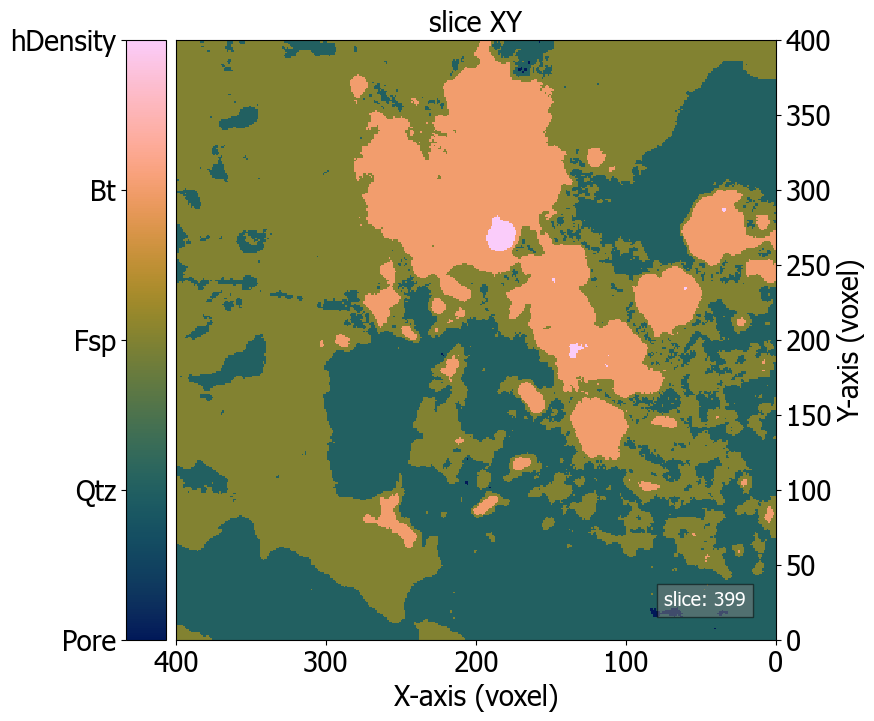

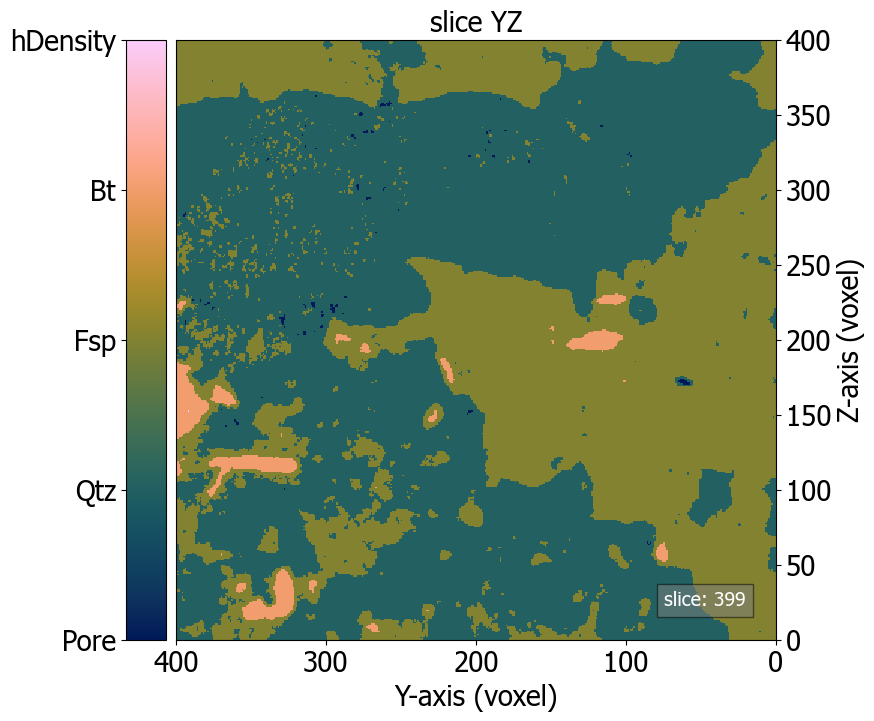

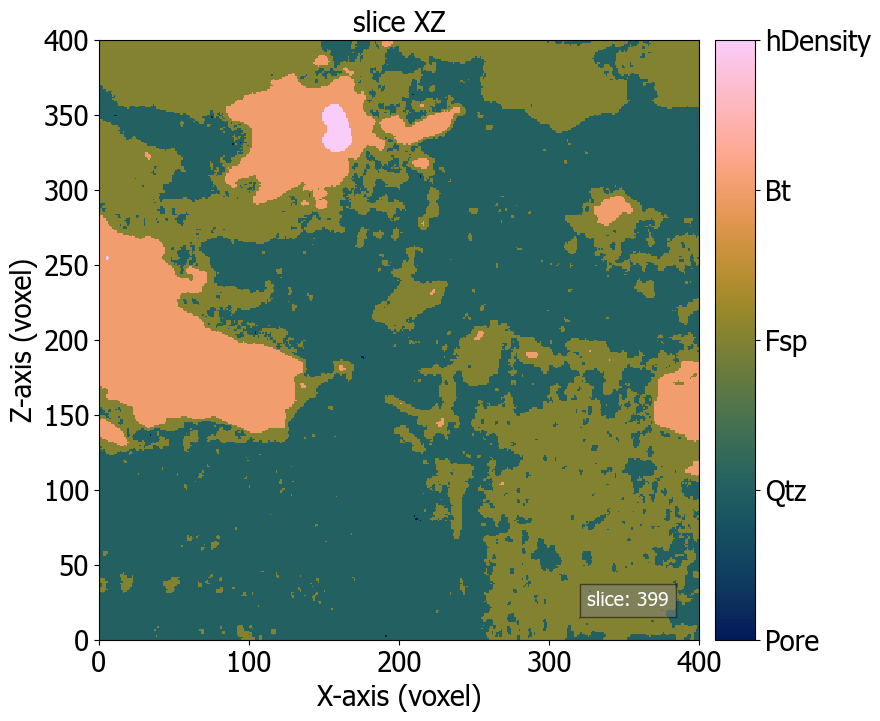

In [32]:
fig_xy, ax = plot_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xy', subvolume=None, labels=labels, title="slice XY", voxel_size=None, dark_mode=False)
# fig_xy, ax = plot_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xy', subvolume=None, labels=labels, title="slice XY", voxel_size=6.74, dark_mode=False)
fig_yz, ax = plot_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='yz', subvolume=None, labels=labels, title="slice YZ", voxel_size=None, dark_mode=False)
fig_xz, ax = plot_slice(data=data_viz, paramsfile=params_file, cmap_set=None, slice=399, plane='xz', subvolume=None, labels=labels, title="slice XZ", voxel_size=None, dark_mode=False)

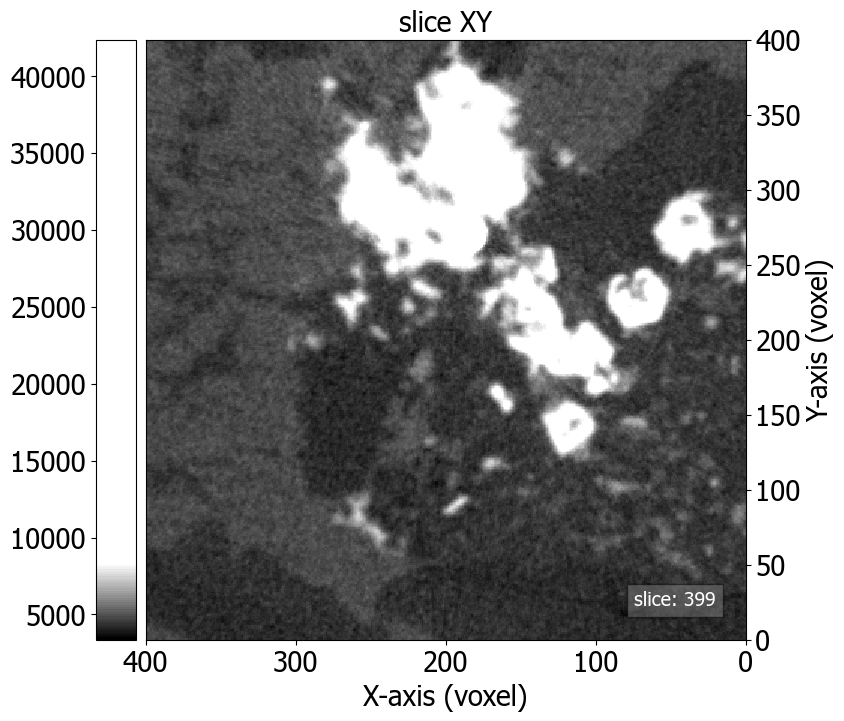

In [21]:
fig_xy, ax = plot_slice(data_raw, paramsfile='400Cube.json', cmap_set="gray", slice=399, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False, cmap_intensity=8)
# fig_xy, ax = plot_slice(data_raw, paramsfile='400Cube.json', cmap_set="coolwarm", slice=399, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False)
# fig_xy, ax = plot_slice(data_raw, paramsfile='400Cube.json', cmap_set="twilight_shifted", slice=399, plane='xy', subvolume=None, labels=None, title="slice XY", voxel_size=None, dark_mode=False)

Finally, the figures can be saved in high quality.

In [22]:
save_figure2(fig_xy, filename='subvolume_plane_xy')
save_figure2(fig_yz, filename='subvolume_plane_yz')
save_figure2(fig_xz, filename='subvolume_plane_xz')

Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_xy.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_yz.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/output/subvolume_plane_xz.png


Get the connected porosity

Let's plot some histograms.

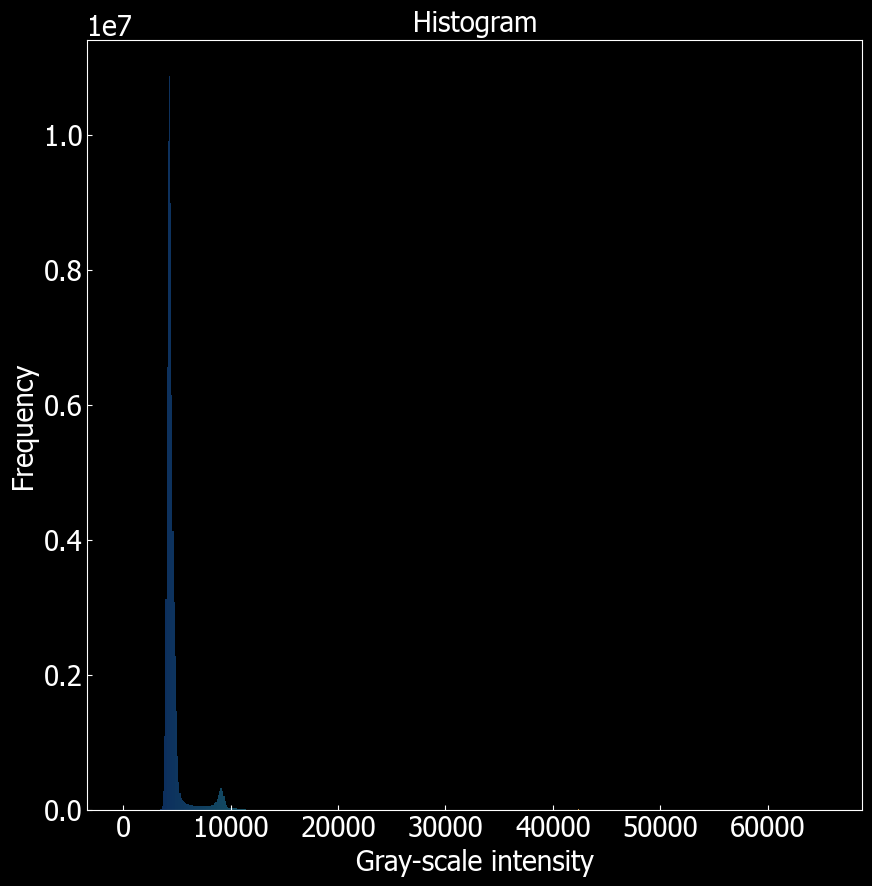

In [23]:
fig_hist = plot_histogram(data_raw, dtype='uint16',cmap_set=None, log_scale=None, dark_mode=True)

In [24]:
output = get_connected_porosity(data, paramsfile='subvolume_100_100_100.json')
con_pore = get_phase_fractions(output)

this function is not implemented yet


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'